In [36]:
# -*- encoding: utf-8 -*-
import sys
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# env: windows
PATH_IMAGE = 'D:\\My_Data\\me_Docs\\Masterarbeit\\master_border_extraction\\images\\test1.png'
image_origin = cv2.imread(PATH_IMAGE, 1)  # color image

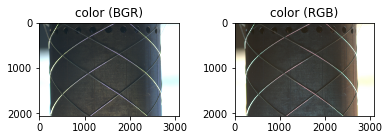

In [43]:
plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.4) # adjust the distance between subplots
plt.subplot(1, 2, 1)
plt.title('color (BGR)')
plt.imshow(image_origin)

image = cv2.cvtColor(image_origin, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.title('color (RGB)')
plt.imshow(image)

#### 1 Check: Histogramm

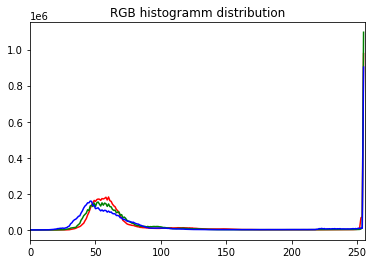

In [44]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('RGB histogramm distribution')
plt.show()

TODOs
- [1] discover the meaning of two parts
- [2] set the left part to 0 => check the effect

- 1) equalization (HE)

In [ ]:
gray_bgr = cv2.cvtColor(image_origin,cv2.COLOR_BGR2GRAY)
equ_gray_bgr = cv2.equalizeHist(gray_bgr)
plt.title('gray with HE')
plt.imshow(gray_bgr)

# gray_rgb = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# equ_gray_rgb = cv2.equalizeHist(gray_rgb)
# plt.imshow(gray_rgb)

Q：why this grayscale image looks like a color image?

In [46]:
# grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
equ_gray = cv2.equalizeHist(gray)

# color
(r, g, b) = cv2.split(image)
rH = cv2.equalizeHist(r)
gH = cv2.equalizeHist(g)
bH = cv2.equalizeHist(b)
# merge channels
equ_rgb = cv2.merge((rH, gH, bH))

Text(0.5, 1.0, 'color (RGB) with HE')

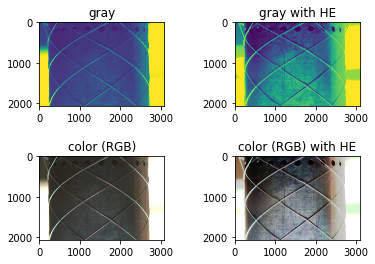

In [48]:
plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.6) 
plt.subplot(2, 2, 1)
plt.imshow(gray)
plt.title('gray')

plt.subplot(2, 2, 2)
plt.imshow(equ_gray)
plt.title('gray with HE')

plt.subplot(2, 2, 3)
plt.imshow(image)
plt.title('color (RGB)')

plt.subplot(2, 2, 4)
plt.imshow(equ_rgb)
plt.title('color (RGB) with HE')

- 2) CLAHE

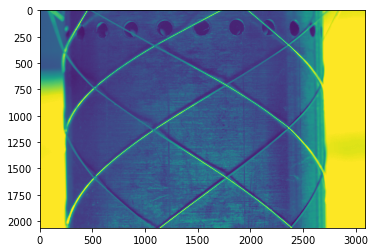

In [32]:
# grayscale
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_gray = clahe.apply(gray)

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(gray)

plt
plt.imshow(clahe_gray)

2 Smooth
- joint bilateral filter
- guided image Filter

3 Scharpening
- color: 
    - V in HSV
    - Y in YCbCr
- grayscale

In [ ]:
name = 'dinggen'
print(f'hello {name}')

In [ ]:
sub_dirs[1]

In [ ]:
src_path = os.path.join(old_path, sub_dirs[1])
dst_path = os.path.join(new_path, sub_dirs[1])
print(src_path, dst_path)

In [ ]:
os.listdir(src_path)

In [ ]:
for sub_dir in sub_dirs:
    print(f'The subdirectory is {sub_dir}.')
    src_path = os.path.join(old_path, sub_dir)
    dst_path = os.path.join(new_path, sub_dir)

    if not os.path.isdir(dst_path):
        os.makedirs(dst_path)
    
    files = [f for f in os.listdir(src_path) if f.con]
    files_num = len(files)
    # choose 20 images in each folder
    choose_files_index = list(range(0, files_num, files_num//19))

    for index in choose_files_index:
        src_file = os.path.join(src_path, files[int(index)])
        copy(src_file, dst_path)

In [ ]:
lst[idx]